## Intermediate Data Science

#### University of Redlands - DATA 201
#### Prof: Joanna Bieri [joanna_bieri@redlands.edu](mailto:joanna_bieri@redlands.edu)
#### [Class Website: data201.joannabieri.com](https://joannabieri.com/data201_intermediate.html)

In [35]:
# Some basic package imports
import os
import numpy as np
import pandas as pd

# Visualization packages
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'
import seaborn as sns

### You Try - 3 Warm-Up Problems From Lecture

## You Try

Write a python **function** that takes as an input a birth date and outputs how old the person is in just years, by using the datetime functionality.



In [36]:
from datetime import datetime
# your code here
def age(bday):
    now = datetime.now()
    return (now-bday).days/365

In [37]:
# Your code here
bday = datetime(2005,12,2)
age(bday)

19.854794520547944

## You try

Use the methods from lecture Timestamp, Period, and groupby() to find the maximum and minimum temperatures for each year in our weather data. Plot both the max and min temperatures together on a line graph with the years on the x-axis.

In [54]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("parthdande/timeseries-weather-dataset")

print("Path to dataset files:", path)
print(os.listdir(path))
df = pd.read_csv(path+'/'+'Weather_Data_1980_2024(hourly).csv')
df.head(5)

Path to dataset files: C:\Users\josee\.cache\kagglehub\datasets\parthdande\timeseries-weather-dataset\versions\2
['Weather_dataset.csv', 'Weather_Data_1980_2024(hourly).csv']


,time,temperature,relative_humidity,dew_point,precipitation (mm),rain (mm),snowfall (cm),pressure_msl (hPa),surface_pressure (hPa),cloud_cover (%),cloud_cover_low (%),cloud_cover_mid (%),cloud_cover_high (%),vapour_pressure_deficit (kPa),wind_speed_10m (km/h),wind_direction,is_Day
0,1980-01-01T00:00,12.7,83,10.0,0.0,0.0,0,1012.8,945.1,1,1,0,0,0.25,7.5,235,0
1,1980-01-01T01:00,12.9,82,9.9,0.0,0.0,0,1012.2,944.5,4,4,0,0,0.26,7.9,231,0
2,1980-01-01T02:00,13.2,82,10.2,0.0,0.0,0,1012.3,944.7,13,14,0,0,0.27,7.5,235,1
3,1980-01-01T03:00,15.9,78,12.0,0.0,0.0,0,1013.5,946.4,23,26,0,0,0.40,6.6,248,1
4,1980-01-01T04:00,19.4,67,13.1,0.0,0.0,0,1014.6,948.2,9,10,0,0,0.75,8.7,265,1


In [55]:
# Change the times to datetime objects
# Save them as the index for the data frame.
def string_to_time(x):
    return datetime.strptime(x,'%Y-%m-%dT%H:%M')

# Convert the time to datetime
df['time'] = df['time'].apply(lambda x: string_to_time(x))
df

,time,temperature,relative_humidity,dew_point,precipitation (mm),rain (mm),snowfall (cm),pressure_msl (hPa),surface_pressure (hPa),cloud_cover (%),cloud_cover_low (%),cloud_cover_mid (%),cloud_cover_high (%),vapour_pressure_deficit (kPa),wind_speed_10m (km/h),wind_direction,is_Day
0,1980-01-01 00:00:00,12.7,83,10.0,0.0,0.0,0,1012.8,945.1,1,1,0,0,0.25,7.5,235,0
1,1980-01-01 01:00:00,12.9,82,9.9,0.0,0.0,0,1012.2,944.5,4,4,0,0,0.26,7.9,231,0
2,1980-01-01 02:00:00,13.2,82,10.2,0.0,0.0,0,1012.3,944.7,13,14,0,0,0.27,7.5,235,1
3,1980-01-01 03:00:00,15.9,78,12.0,0.0,0.0,0,1013.5,946.4,23,26,0,0,0.40,6.6,248,1
4,1980-01-01 04:00:00,19.4,67,13.1,0.0,0.0,0,1014.6,948.2,9,10,0,0,0.75,8.7,265,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389491,2024-06-06 19:00:00,24.8,90,23.0,0.0,0.0,0,1010.1,945.2,39,2,12,100,0.32,10.6,252,0
389492,2024-06-06 20:00:00,24.3,92,22.9,0.0,0.0,0,1009.4,944.4,33,3,1,100,0.25,11.9,265,0
389493,2024-06-06 21:00:00,24.1,91,22.5,0.0,0.0,0,1008.7,943.7,34,4,1,100,0.27,13.1,261,0
389494,2024-06-06 22:00:00,24.0,89,22.1,0.0,0.0,0,1008.2,943.2,37,8,0,100,0.32,13.7,267,0


In [61]:
# Your code here
df['year'] = df['time'].dt.to_period('Y')
temp_min_max = df['temperature'].groupby(df['year']).agg(['min','max'])
temp_min_max

,min,max
year,,
1980,9.8,39.9
1981,10.7,40.3
1982,11.1,38.1
1983,8.7,41.0
1984,9.2,40.0
1985,10.9,40.3
1986,10.2,39.1
1987,11.0,40.4
1988,11.1,40.7


<Axes: xlabel='year'>

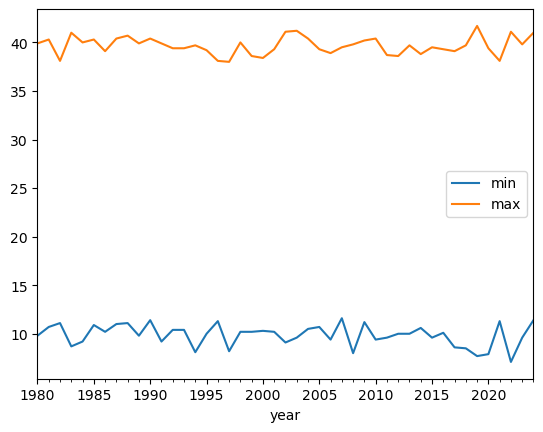

In [62]:
temp_min_max.plot()

## You Try

Add the other two stocks to the correlation graph from the lecture notes. Make sure to label the graph clearly and make it look nice! Experiment with different values for your moving average window. What happens when you change this and why?



In [63]:
file = 'data/stock_px.csv'
df_stocks = pd.read_csv(file,parse_dates=True,index_col=0)
df_resample = df_stocks.resample('B').ffill()
# Get the percent changes
pcng_spx = df_resample['SPX'].pct_change()
pcng_aapl = df_resample['AAPL'].pct_change()

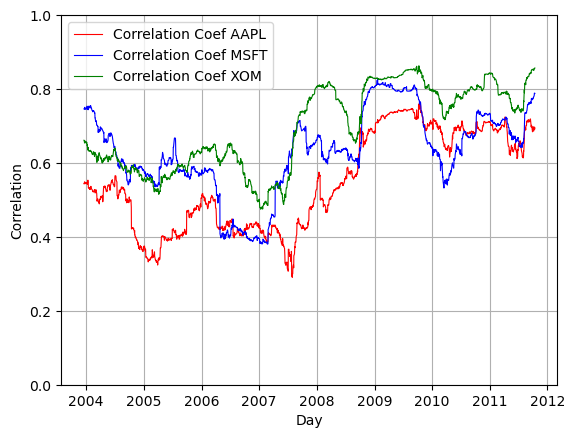

In [76]:
# Your code here
pcng_msft = df_resample['MSFT'].pct_change()
pcng_xom = df_resample['XOM'].pct_change()

corr_aapl = pcng_aapl.rolling(250).corr(pcng_spx)
corr_msft = pcng_msft.rolling(250).corr(pcng_spx)
corr_xom = pcng_xom.rolling(250).corr(pcng_spx)

plt.plot(df_resample.index,corr_aapl,'r-',linewidth=.8,label='Correlation Coef AAPL')
plt.plot(df_resample.index,corr_msft,'b-',linewidth=.8,label='Correlation Coef MSFT')
plt.plot(df_resample.index,corr_xom,'g-',linewidth=.8,label='Correlation Coef XOM')
plt.grid()
plt.xlabel('Day')
plt.ylabel('Correlation')
plt.legend()
plt.ylim([0,1])

plt.show()

In [64]:
df_stocks

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93
...,...,...,...,...
2011-10-10,388.81,26.94,76.28,1194.89
2011-10-11,400.29,27.00,76.27,1195.54
2011-10-12,402.19,26.96,77.16,1207.25
2011-10-13,408.43,27.18,76.37,1203.66


Changing the value of the moving average window changes the window size. A larger window size is like having a larger bin size for a histogram. That is, the data gets flatter and approaches a horizontal line which is the average of the dataset.

---------------
## Time Series Data - Day9 HW

**Idea from DATAQUEST** 
- Author = Jennifer Walker
- Environmental scientist / data geek / Python evangelist.

Open Power System Data (OPSD) for Germany:

Electricity production and consumption are reported as daily totals in gigawatt-hours (GWh). The columns of the data file are:

- Date — The date (yyyy-mm-dd format)
- Consumption — Electricity consumption in GWh
- Wind — Wind power production in GWh
- Solar — Solar power production in GWh
- Wind+Solar — Sum of wind and solar power production in GWh

Below I have added some prompts to lead you through the timeseries analysis.


Your final notebooks should:

- [ ] Be a completely new notebook with just the Day9 stuff in it NO YOU TRY: Read in the data, make the plots. Make sure to discuss what you see and comment on why your plots are great!
- [ ] Be reproducible with junk code removed.
- [ ] Have lots of language describing what you are doing, especially for questions you are asking or things that you find interesting about the data. Use complete sentences, nice headings, and good markdown formatting: https://www.markdownguide.org/cheat-sheet/
- [ ] It should run without errors from start to finish.

**Remember to Proof Read and Proof Run your code** Restart the kernel and go through it all once before submitting.

In [8]:
df = pd.read_csv('data/opsd_germany_daily.csv', parse_dates = True, index_col=0)
df

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.18400,NaN,NaN,NaN
2006-01-02,1380.52100,NaN,NaN,NaN
2006-01-03,1442.53300,NaN,NaN,NaN
2006-01-04,1457.21700,NaN,NaN,NaN
2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,1295.08753,584.277,29.854,614.131


## Data Basics and Preparation

Here you get some basic familiarity with the data:

- run stats on each of the variables
- count nans in each column
- look at the data types
- double check that you understand the variables and their units
- what is the date range and frequency
- add columns to the data set: Year, Month, and Weekday Name

## Data Exploration - Basic Visualization

Start to make plots and see if you can generate some questions about the data. Make sure that you make observations about each plot - say what you see and what it means in terms of the data.

- Plot the overall consumption over time.
- Plot the wind and solar consumption over time.

- Choose a focal year and redo the plots to look at variability over the year.
- Redo this for a focal month

## Further Exploration

Now continue exploring the data to see what you can find out. Remember to explain what you are learning from each graph or calculation. Add guiding words in markdown to talk about what your code should be doing and why.

- How does seasonality effect the energy consumption? Consider the consumption grouped on a monthly basis. You could look at max, min, mean, etc. Make an interesting plot of this data (bar plot, box plot, etc). What do you learn?

- How does the day of the week change energy consumption?

- Using downsampling, plot on the same graph the daily (original data) and the average weekly (downsampled data) consumption for both solar and wind.

- Using downsampling plot the yearly rolling average of both wind and solar consumption.

- See if you can come up with a really cool graph of your own!

## Conclusion